<a href="https://colab.research.google.com/github/jfjoung/AI_For_Chemistry/blob/main/Week_6_Molecule_generation_(VAE).ipynbb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## üéØ ÌïôÏäµ Î™©Ìëú

- **Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏(Molecular Generative Models)**Ïùò Í∞úÎÖêÍ≥º **ÌôîÌïôÏóêÏÑúÏùò ÌôúÏö© ÏÇ¨Î°Ä**Î•º Ïù¥Ìï¥ÌïúÎã§.  
- **SMILES Í∏∞Î∞òÏùò Î∂ÑÏûê ÌëúÌòÑ Î∞©Ïãù**Í≥º Ïù¥Î•º ÌôúÏö©Ìïú **ÏÉùÏÑ± Î™®Îç∏ ÌïôÏäµ Î∞©Î≤ï**ÏùÑ ÌïôÏäµÌïúÎã§.  
- **Recurrent Neural Networks (RNNs)**Î•º ÌôúÏö©Ìïú **SMILES ÏÉùÏÑ± Î™®Îç∏**Ïùò Íµ¨Ï°∞ÏôÄ ÏûëÎèô ÏõêÎ¶¨Î•º Ïù¥Ìï¥ÌïúÎã§.  
- **RNN ÌïôÏäµÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨** Î∞è **Î¨∏ÏûêÏó¥ ÏÉùÏÑ± Î∞©Ïãù(greedy sampling, multinomial sampling)**Ïùò Ï∞®Ïù¥Î•º Î∞∞Ïö¥Îã§.  
- Ïã§ÏäµÏùÑ ÌÜµÌï¥ **ÌõàÎ†®Îêú Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏ÏùÑ ÌèâÍ∞Ä**ÌïòÍ≥†, **ÏÉùÏÑ±Îêú Î∂ÑÏûêÏùò Ïú†Ìö®ÏÑ±(validity), Í≥†Ïú†ÏÑ±(novelty), Îã§ÏñëÏÑ±(diversity)** Îì±Ïùò ÏßÄÌëúÎ•º ÌÜµÌï¥ Î™®Îç∏ ÏÑ±Îä•ÏùÑ Ìï¥ÏÑùÌïúÎã§.  
- **ÌôîÌïôÏ†ÅÏúºÎ°ú ÌÉÄÎãπÌïú Î∂ÑÏûê ÏÉùÏÑ±**ÏùÑ ÏúÑÌïú Î™®Îç∏ Í∞úÏÑ† Î∞©Ìñ•(Ïòà: Ï°∞Í±¥Î∂Ä ÏÉùÏÑ±, graph-based Î™®Îç∏ Îì±)Ïóê ÎåÄÌï¥ Í∞ÑÎã®Ìûà Í≥†Ï∞∞ÌïúÎã§.  


In [1]:
# ÏÇ¨Ïö©Ìï† Ïú†Ìã∏Î¶¨Ìã∞ Ìï®ÏàòÎì§Ïù¥ Ï†ïÏùòÎêú utils.py ÌååÏùºÏùÑ Îã§Ïö¥Î°úÎìú
!wget https://raw.githubusercontent.com/jfjoung/AI_For_Chemistry/main/data/week6/utils.py -O utils.py

# ÏÇ¨Ï†Ñ ÌïôÏäµÎêú RNN Î™®Îç∏ ÌååÏùº Îã§Ïö¥Î°úÎìú
!wget https://raw.githubusercontent.com/jfjoung/AI_For_Chemistry/main/data/week6/pretrained.rnn.pth -O pretrained.rnn.pth

# ÏÇ¨Ï†Ñ ÌïôÏäµÎêú VAE Î™®Îç∏ ÌååÏùº Îã§Ïö¥Î°úÎìú
!wget https://raw.githubusercontent.com/jfjoung/AI_For_Chemistry/main/data/week6/pretrained.vae.pt -O pretrained.vae.pt

!git clone https://github.com/rociomer/dl-chem-101.git

# RNN ÌïôÏäµÏóê ÏÇ¨Ïö©Îêú SMILES Îç∞Ïù¥ÌÑ∞ ÌååÏùº Îã§Ïö¥Î°úÎìú
!wget https://raw.githubusercontent.com/jfjoung/AI_For_Chemistry/main/data/week6/zinc.smi -O zinc.smi

# VAE Î™®Îç∏ÏùÑ ÏúÑÌïú Î∂ÑÏûê Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ìè¨Ìï®Ìïú Ï†ÄÏû•ÏÜå Î≥µÏ†ú
!git clone https://github.com/aksub99/molecular-vae.git

# ÏïïÏ∂ïÎêú Î∂ÑÏûê Îç∞Ïù¥ÌÑ∞ ÌååÏùº ÏïïÏ∂ï Ìï¥Ï†ú
import zipfile
zip_ref = zipfile.ZipFile('molecular-vae/data/processed.zip', 'r')
zip_ref.extractall('molecular-vae/data/')
zip_ref.close()


--2025-04-04 11:47:10--  https://raw.githubusercontent.com/jfjoung/AI_For_Chemistry/main/data/week6/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2031 (2.0K) [text/plain]
Saving to: ‚Äòutils.py‚Äô

utils.py            100%[===================>]   1.98K  --.-KB/s    in 0s      

2025-04-04 11:47:10 (19.8 MB/s) - ‚Äòutils.py‚Äô saved [2031/2031]

--2025-04-04 11:47:11--  https://raw.githubusercontent.com/jfjoung/AI_For_Chemistry/main/data/week6/pretrained.rnn.pth
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25454495 (2

In [2]:
# RNN Î™®Îç∏Ïù¥ Ìè¨Ìï®Îêú Ï†ÄÏû•ÏÜå ÎîîÎ†âÌÜ†Î¶¨Î°ú Ïù¥Îèô
%cd dl-chem-101

# SMILES ÏÉùÏÑ±ÏùÑ ÏúÑÌïú LSTM ÏΩîÎìúÍ∞Ä ÏûàÎäî ÌïòÏúÑ Ìè¥ÎçîÎ°ú Ïù¥Îèô
%cd 03_gen_SMILES_LSTM

# ÌòÑÏû¨ ÎîîÎ†âÌÜ†Î¶¨Î•º editable Î™®ÎìúÎ°ú Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò (ÏΩîÎìú ÏàòÏ†ï Ïãú Ï¶âÏãú Î∞òÏòÅÎê®)
!pip install -e .


/content/dl-chem-101
/content/dl-chem-101/03_gen_SMILES_LSTM
Obtaining file:///content/dl-chem-101/03_gen_SMILES_LSTM
  Preparing metadata (setup.py) ... done
  Attempting uninstall: smiles_lstm
    Found existing installation: smiles_lstm 1.0.0
    Uninstalling smiles_lstm-1.0.0:
      Successfully uninstalled smiles_lstm-1.0.0
  Running setup.py develop for smiles_lstm


In [3]:
!pip install rdkit
!pip install molplotly
!pip install torch==2.1
!pip install numpy==1.26
!pip install scikit-learn
!pip install h5py
!pip install dash==2.9.2
!pip install tqdm

In [4]:
# ÏÉÅÏúÑ Ìè¥Îçî(dl-chem-101Ïùò Î£®Ìä∏ ÎîîÎ†âÌÜ†Î¶¨)Î°ú Ïù¥Îèô
%cd ../..

# üîÑ ***Ïù¥Ï†ú ÎÖ∏Ìä∏Î∂ÅÏùò Îü∞ÌÉÄÏûÑÏùÑ Î∞òÎìúÏãú Ïû¨ÏãúÏûëÌï¥Ïïº Ìï©ÎãàÎã§!***

# ‚úÖ Ïôú Ïû¨ÏãúÏûëÌï¥Ïïº ÌïòÎÇòÏöî?
# - pipÏúºÎ°ú ÏÉà Ìå®ÌÇ§ÏßÄÎ•º ÏÑ§ÏπòÌïòÍ±∞ÎÇò, Í∏∞Ï°¥ Ìå®ÌÇ§ÏßÄÎ•º Îã§Î•∏ Î≤ÑÏ†ÑÏúºÎ°ú ÏÑ§ÏπòÌïòÎ©¥ Colab ÌôòÍ≤ΩÏóê Ï¶âÏãú Î∞òÏòÅÎêòÏßÄ ÏïäÏäµÎãàÎã§.
# - ÌäπÌûà `pip install -e .` Í∞ôÏùÄ editable ÏÑ§ÏπòÎäî Îü∞ÌÉÄÏûÑÏùÑ Ïû¨ÏãúÏûëÌï¥Ïïº Ï†ÅÏö©Îê©ÎãàÎã§.
# - ÎòêÌïú Ìå®ÌÇ§ÏßÄÎÇò Î™®Îìà Í≤ΩÎ°ú ÏÑ§Ï†ï Ï∂©ÎèåÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ Íπ®ÎÅóÌïú ÌôòÍ≤ΩÏóêÏÑú ÏãúÏûëÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.

# üîß Ïñ¥ÎñªÍ≤å Ïû¨ÏãúÏûëÌïòÎÇòÏöî?
# Î©îÎâ¥ÏóêÏÑú [Îü∞ÌÉÄÏûÑ] ‚Üí [ÏÑ∏ÏÖò Îã§Ïãú ÏãúÏûë] ÌÅ¥Î¶≠
# ÎòêÎäî Îã®Ï∂ïÌÇ§: Ctrl+M ‚Üí . (Windows) / Cmd+M ‚Üí . (Mac)

# üìå Ïû¨ÏãúÏûë ÌõÑÏóêÎäî "Îß® ÏúÑ ÏÖÄÎ∂ÄÌÑ∞" ÏàúÏÑúÎåÄÎ°ú Î™®Îì† ÏΩîÎìúÎ•º Îã§Ïãú Ïã§ÌñâÌï¥Ïïº Ìï©ÎãàÎã§.
# ÏÑ§ÏπòÎêú Ìå®ÌÇ§ÏßÄ, Îã§Ïö¥Î°úÎìúÌïú ÌååÏùº, Î≥ÄÏàò Îì±Ïù¥ Î™®Îëê Ï¥àÍ∏∞ÌôîÎêòÏóàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.


/content


# Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏ (Molecular Generative Models)

ÏµúÍ∑º Î™á ÎÖÑ ÏÇ¨Ïù¥, Îã§ÏñëÌïú **Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏**Ïù¥ ÌôúÎ∞úÌûà Í∞úÎ∞úÎêòÍ≥† ÏûàÏäµÎãàÎã§. Î™®Îç∏Ïùò Íµ¨ÌòÑ Î∞©ÏãùÏùÄ Îã§Î•º Ïàò ÏûàÏßÄÎßå, ÎåÄÎ∂ÄÎ∂Ñ Îã§ÏùåÍ≥º Í∞ôÏùÄ Í≥µÌÜµÏ†êÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§:

1. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê **Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî ÏÉàÎ°úÏö¥ Î∂ÑÏûê**Î•º ÏÉùÏÑ±Ìï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê, **ÏÉàÎ°úÏö¥ ÌôîÌïô Í≥µÍ∞ÑÏùÑ ÌÉêÏÉâ**Ìï† Ïàò ÏûàÎäî Í∞ÄÎä•ÏÑ±ÏùÑ Í∞ÄÏßëÎãàÎã§.  

2. ÏµúÏ†ÅÌôî ÏïåÍ≥†Î¶¨Ï¶òÍ≥º Í≤∞Ìï©ÌïòÏó¨, **ÌäπÏ†ï Î™©ÌëúÎ•º ÎßåÏ°±ÌïòÎäî Î∂ÑÏûê**(Ïòà: ÎÜíÏùÄ Ïö©Ìï¥ÎèÑÎ•º Í∞ñÎäî Î∂ÑÏûê)Î•º ÏÉùÏÑ±ÌïòÎèÑÎ°ù Î™®Îç∏ÏùÑ Ï°∞Ï†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.

üëâ Îã§Ïùå Ï£ºÏóêÎäî [`REINVENT`](https://github.com/MolecularAI/Reinvent)ÎùºÎäî Ïò§ÌîàÏÜåÏä§ SMILES Í∏∞Î∞ò Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏ÏùÑ ÏßÅÏ†ë Ïã§ÏäµÌï¥Î≥º ÏòàÏ†ïÏûÖÎãàÎã§.  
Ïù¥ Î™®Îç∏ÏùÄ AstraZenecaÏóêÏÑú Í∞úÎ∞úÎêòÏóàÏúºÎ©∞, Ïó¨Îü¨Î∂ÑÏù¥ ÏßÅÏ†ë ÏõêÌïòÎäî Î¨ºÏÑ± Î™©ÌëúÎ•º ÏÑ§Ï†ïÌïòÍ≥†,  
Î™®Îç∏Ïù¥ Í∑∏ Î™©ÌëúÏóê ÎßûÎäî Î∂ÑÏûêÎ•º ÌïôÏäµÌï¥ ÏÉùÏÑ±ÌïòÎäî Í≥ºÏ†ïÏùÑ Ï≤¥ÌóòÌïòÍ≤å Îê©ÎãàÎã§! ü§†  
ÏòàÏãúÎ°ú, Ïã§Ï†úÎ°ú `REINVENT`Î•º ÌôúÏö©Ìï¥ Ïã§ÌóòÏ†ÅÏúºÎ°ú Í≤ÄÏ¶ùÎêú **ÎÇòÎÖ∏Î™∞ ÎÜçÎèÑÏùò Í∞ïÎ†•Ìïú ÏñµÏ†úÏ†ú**Î•º ÏÑ§Í≥ÑÌïú Ïó∞Íµ¨ÎèÑ ÏûàÏäµÎãàÎã§:  
[ÎÖºÎ¨∏ Î≥¥Í∏∞](https://chemistry-europe.onlinelibrary.wiley.com/doi/10.1002/cmdc.202000786)

---

ÏÉùÏÑ± Î™®Îç∏ÏùÄ ÏÇ¨Ïã§ ÏÉàÎ°úÏö¥ Í∞úÎÖêÏùÄ ÏïÑÎãàÎ©∞, Î®∏Ïã†Îü¨Îãù Î∂ÑÏïºÏóêÏÑúÎäî Ïò§ÎûòÏ†ÑÎ∂ÄÌÑ∞ Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±Í≥º Í∞ôÏùÄ ÏùëÏö©Ïóê ÌôúÏö©ÎêòÏñ¥ ÏôîÏäµÎãàÎã§.  
ÏòàÎ•º Îì§Ïñ¥, Ïó¨Îü¨Î∂ÑÏù¥ ÏûêÏ£º Î≥¥Îäî Î©ãÏßÑ ÏÉùÏÑ± Ïù¥ÎØ∏ÏßÄÎì§ÏùÄ [Stable Diffusion](https://huggingface.co/spaces/stabilityai/stable-diffusion)Í≥º Í∞ôÏùÄ Î™®Îç∏ÏóêÏÑú ÎπÑÎ°ØÎêú Í≤ÉÏûÖÎãàÎã§.  
ÌïòÏßÄÎßå **Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏**ÏùÄ ÎπÑÍµêÏ†Å Ï¥àÍ∏∞ Îã®Í≥ÑÏóê ÏûàÎäî Î∂ÑÏïºÎ°ú, ÏµúÍ∑º Îπ†Î•¥Í≤å Î∞úÏ†ÑÌïòÎ©∞ Ï†úÏïΩ Î∞è Î∞îÏù¥Ïò§ ÏÇ∞ÏóÖÏóêÏÑú ÌôúÎ∞úÌûà Ï±ÑÌÉùÎêòÍ≥† ÏûàÏäµÎãàÎã§.

---

Îã§ÏùåÏùÄ Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏ Î∂ÑÏïºÏóêÏÑúÏùò Ï¥àÍ∏∞ ÎåÄÌëú ÎÖºÎ¨∏Îì§ÏûÖÎãàÎã§ (Ï†ÑÏ≤¥ Î™©Î°ùÏùÄ ÏïÑÎãôÎãàÎã§):

- [Variational Autoencoder (VAE)](https://pubs.acs.org/doi/10.1021/acscentsci.7b00572): VAEÎ•º Î∂ÑÏûê ÏÉùÏÑ±Ïóê Ï≤òÏùå Ï†ÅÏö©Ìïú ÏòàÏãú  
- [Generative Adversarial Network (GAN)](https://arxiv.org/abs/1805.11973): GANÏùÑ Î∂ÑÏûê ÏÉùÏÑ±Ïóê Ï†ÅÏö©Ìïú Ï¥àÍ∏∞ ÏòàÏãú  
- [Recurrent Neural Network (RNN)](https://pubs.acs.org/doi/10.1021/acscentsci.7b00512): RNN Í∏∞Î∞ò Î∂ÑÏûê ÏÉùÏÑ±ÏùÑ Ï≤òÏùå ÏãúÎèÑÌïú ÏÇ¨Î°Ä Ï§ë ÌïòÎÇò  
- [RNN + Reinforcement Learning (RL)] [Link 1](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-017-0235-x) / [Link 2](https://www.science.org/doi/10.1126/sciadv.aap7885): RNNÍ≥º Í∞ïÌôîÌïôÏäµ(RL)ÏùÑ Í≤∞Ìï©ÌïòÏó¨ **Î™©Ìëú ÌäπÏÑ±ÏùÑ ÎßåÏ°±ÌïòÎäî Î∂ÑÏûê**Î•º ÏÉùÏÑ±ÌïòÎäî Ï¥àÍ∏∞ Ïó∞Íµ¨Îì§  

---

Ïù¥Î≤à ÌäúÌÜ†Î¶¨Ïñº(Part 1)ÏóêÏÑúÎäî Ïù¥Îü¨Ìïú ÏÉùÏÑ± Î™®Îç∏Îì§Ïùò Í∏∞Ï¥àÎ•º ÏÜåÍ∞úÌïòÍ≥†,  
Í∞Å Î™®Îç∏Ïù¥ **Ïñ¥ÎñªÍ≤å Î∂ÑÏûêÎ•º ÏÉùÏÑ±ÌïòÎäîÏßÄ** Í∞ÑÎã®Ìûà Ïã§ÏäµÌï¥ Î¥ÖÎãàÎã§.  
Í∞Å Î™®Îç∏Ïóê ÎåÄÌï¥ ÌïµÏã¨ Í∞úÎÖêÏùÑ Ï†ïÎ¶¨ÌïòÍ≥†, Í¥ÄÎ†® ÎÖºÎ¨∏ÎèÑ Ìï®Íªò Ï∞∏Í≥†Ìï† Ïàò ÏûàÎèÑÎ°ù ÏÜåÍ∞úÌï©ÎãàÎã§.


# 1. ÏàúÌôò Ïã†Í≤ΩÎßù (Recurrent Neural Network, RNN)

#### Ïù¥ ÏÑπÏÖòÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî `utils` Î™®ÎìàÏùò ÏΩîÎìúÎäî [`Roc√≠o Mercado`](https://rociomer.github.io/)Ïùò [dl-chem-101 Ï†ÄÏû•ÏÜå](https://github.com/rociomer/dl-chem-101/tree/main/03_gen_SMILES_LSTM)ÏóêÏÑú Í∞ÄÏ†∏Ïò® Í≤ÉÏûÖÎãàÎã§.

> üîî **Ï∞∏Í≥†:** Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏ÏùÄ 2Ï£ºÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏúºÎ©∞, Ïó¨Îü¨Î∂ÑÏù¥ ÏßÅÏ†ë `REINVENT`Î•º Ïù¥Ïö©Ìï¥ Î∂ÑÏûê ÏÉùÏÑ± Ïã§ÌóòÏùÑ ÏàòÌñâÌïòÍ≥†,  
> `REINVENT` (ÎòêÎäî Îã§Î•∏ SMILES Í∏∞Î∞ò ÏÉùÏÑ± Î™®Îç∏)Ïù¥ **Ïñ¥ÎñªÍ≤å ÏûëÎèôÌïòÎäîÏßÄÎ•º Îã®Í≥ÑÎ≥ÑÎ°ú ÏûêÏÑ∏Ìûà Î∂ÑÏÑù**Ìï† ÏòàÏ†ïÏûÖÎãàÎã§.  
> Îî∞ÎùºÏÑú Ïù¥Î≤à ÏÑπÏÖòÏóêÏÑúÎäî **Î™®Îç∏ ÎÇ¥Î∂Ä ÏΩîÎìú**Îäî Îã§Î£®ÏßÄ ÏïäÍ≥†, **Í∞úÎÖêÏ†ÅÏù∏ ÏöîÏïΩ ÏÑ§Î™Ö**Îßå Ï†úÍ≥µÌï©ÎãàÎã§.

---

`ÏàúÌôò Ïã†Í≤ΩÎßù (RNN)`ÏùÄ Í≥ºÍ±∞Ïóê **ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ (NLP)** Î∂ÑÏïºÏóêÏÑú ÎÑêÎ¶¨ ÏÇ¨Ïö©ÎêòÏóàÎçò Î™®Îç∏ÏûÖÎãàÎã§.  
ÏòàÎ•º Îì§Ïñ¥, Î¨∏Ïû•ÏùÑ Í∏∞Î∞òÏúºÎ°ú Ïñ∏Ïñ¥Î•º Î≤àÏó≠ÌïòÎäî Í∏∞Í≥ÑÌïôÏäµ Î™®Îç∏Ïóê ÏÇ¨Ïö©ÎêòÏóàÏäµÎãàÎã§.
ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ïù¥ Î™®Îç∏ÏùÄ Îã§ÏùåÏóê Ïò¨ **"ÏöîÏÜå(element)"** Î•º ÏòàÏ∏°ÌïòÎèÑÎ°ù ÌïôÏäµÎê©ÎãàÎã§.  
(Ïó¨Í∏∞ÏÑú "ÏöîÏÜå"Îäî Î¨∏Îß•Ïóê Îî∞Îùº Î¨∏Ïûê, Îã®Ïñ¥, SMILESÏùò ÌÜ†ÌÅ∞ Îì± Îã§ÏñëÌï† Ïàò ÏûàÏäµÎãàÎã§)

ÏòàÎ•º Îì§Ïñ¥ Îã§ÏùåÍ≥º Í∞ôÏùÄ Î¨∏Ïû•ÏùÑ ÏÉùÍ∞ÅÌï¥Î¥ÖÏãúÎã§:

**It's so hot outside, I want to eat**

ÏúÑ Î¨∏Ïû•ÏóêÏÑú **ÏßÄÍ∏àÍπåÏßÄÏùò Îã®Ïñ¥Îì§ÏùÑ Î∞îÌÉïÏúºÎ°ú Îã§Ïùå ÏöîÏÜåÎ•º ÏòàÏ∏°**ÌïúÎã§Í≥† Ìï† Îïå,  
ÏûêÏó∞Ïä§Îü¨Ïö¥ Îã§Ïùå Îã®Ïñ¥Îäî "ice cream"Ïù¥ Îê† Ïàò ÏûàÏúºÎ©∞, Ï†ÑÏ≤¥ Î¨∏Ïû•ÏùÄ Ïù¥Î†áÍ≤å ÏôÑÏÑ±Îê©ÎãàÎã§:

**It's so hot outside, I want to eat ice cream**

Ïó¨Í∏∞ÏÑú Ï§ëÏöîÌïú Í∞úÎÖêÏù¥ Î∞îÎ°ú **Î¨∏Îß•(context)**ÏûÖÎãàÎã§.  
"ice cream"Ïù¥ Ï†ÅÏ†àÌïú Ïù¥Ïú†Îäî Ïïû Î¨∏Ïû•Ïóê "ÎçîÏö¥ ÎÇ†Ïî®"ÎùºÎäî Î¨∏Îß•Ïù¥ ÏûàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.  
Ïù¥Ï≤òÎüº **Î¨∏Îß•ÏùÑ Ïù¥Ìï¥ÌïòÍ≥† Î∞òÏòÅÌïòÎäî Îä•Î†•**Ïù¥ Î™®Îç∏ÏóêÍ≤å Îß§Ïö∞ Ï§ëÏöîÌï©ÎãàÎã§.  
ÌïòÏßÄÎßå Í∏¥ Î¨∏Ïû•Ïù¥ÎÇò Ïó¨Îü¨ Î¨∏Îã®Ïù¥ Ïù¥Ïñ¥ÏßÄÎäî Í≤ΩÏö∞, Í∏∞Ï°¥ RNN Î™®Îç∏ÏùÄ **Ïò§Îûú Î¨∏Îß•ÏùÑ Í∏∞ÏñµÌïòÎäî Îç∞ Ïñ¥Î†§ÏõÄ**ÏùÑ Í≤™ÏóàÏäµÎãàÎã§.

ÏµúÍ∑ºÏóêÎäî [`Transformer`](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf) Î™®Îç∏Ïù¥ Ïù¥ Î¨∏Ï†úÎ•º Îß§Ïö∞ Ìö®Í≥ºÏ†ÅÏúºÎ°ú Ìï¥Í≤∞ÌïòÎ©¥ÏÑú, ÌòÑÏû¨ NLP Î∂ÑÏïºÏóêÏÑúÎäî RNN ÎåÄÏã† Í±∞Ïùò ÎåÄÎ∂ÄÎ∂Ñ **Transformer**Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.  
(`ChatGPT`ÎèÑ Transformer Í∏∞Î∞ò Î™®Îç∏ÏûÖÎãàÎã§)

---

Í∑∏Î†áÎã§Î©¥ Ïù¥ ÎÇ¥Ïö©ÏùÑ **Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏**Í≥º Ïñ¥ÎñªÍ≤å Ïó∞Í≤∞Ìï† Ïàò ÏûàÏùÑÍπåÏöî?

ÎåÄÎ∂ÄÎ∂ÑÏùò Î∂ÑÏûêÎì§ÏùÄ `SMILES` Î¨∏ÏûêÏó¥Î°ú ÌëúÌòÑÌï† Ïàò ÏûàÏúºÎ©∞, Ïù¥ SMILES Î¨∏ÏûêÏó¥ÏùÄ Î≥¥ÌÜµ **Í∑∏Î¶¨ Í∏∏ÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê**,  RNN Î™®Îç∏Ïù¥ Ïù¥Ï≤òÎüº ÏßßÏùÄ ÏãúÌÄÄÏä§Î•º ÏòàÏ∏°ÌïòÎäî Îç∞Îäî **Îß§Ïö∞ Ìö®Í≥ºÏ†Å**ÏûÖÎãàÎã§.  
Ïã§Ï†úÎ°ú RNN Í∏∞Î∞ò **Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏**ÏùÄ `SMILES` Î¨∏Î≤ïÏùÑ Ïûò ÌïôÏäµÌïòÍ≥†,  Ïú†Ìö®Ìïú Î∂ÑÏûêÎ•º ÏÉùÏÑ±ÌïòÎäî Îç∞ Îõ∞Ïñ¥ÎÇú ÏÑ±Îä•ÏùÑ Î≥¥ÏûÖÎãàÎã§.

ÏòàÎ•º Îì§Ïñ¥ ÏïÑÎûòÎäî ÌïòÎÇòÏùò Î∂ÑÏûêÏôÄ Í∑∏Ïóê ÎåÄÏùëÌïòÎäî `SMILES` Î¨∏ÏûêÏó¥ÏûÖÎãàÎã§: NC1=CC(O)=CC=C1

<p align="middle">
  <img src="https://raw.githubusercontent.com/jfjoung/AI_For_Chemistry/main/img/smiles-example.png" width="200"/>
</p>

# 1.1 Claim

Ïù¥Î≤à ÏÑπÏÖòÏóêÏÑúÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ Ï£ºÏû•ÏùÑ Ìï¥Î¥ÖÏãúÎã§:

> **‚ÄòÎ∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏(Molecular Generative Model)‚ÄôÏùÑ ÌïôÏäµÌïòÎäî Í≤ÉÏùÄ, Îã®ÏàúÌûà ÏÉàÎ°úÏö¥ Î∂ÑÏûêÎ•º ÏÉùÏÑ±ÌïòÎäî Î™®Îç∏ÏùÑ ÎßåÎìúÎäî Í≤ÉÏù¥ ÏïÑÎãôÎãàÎã§.  
> Ïò§ÌûàÎ†§ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Í∞Ä Îî∞Î•¥Îäî ‚ÄòÌôïÎ•† Î∂ÑÌè¨(probability distribution)‚ÄôÎ•º Ïû¨ÌòÑÌïòÎäî Î™®Îç∏ÏùÑ ÎßåÎìúÎäî Í≤ÉÏûÖÎãàÎã§.**

Ïù¥Í≤å Î¨¥Ïä® ÎßêÏùºÍπåÏöî? ü•¥

---

Ïù¥Î≤àÏóêÎäî "Îã§Ïùå ÏöîÏÜåÎ•º ÏòàÏ∏°ÌïúÎã§"Îäî Í∞úÎÖêÏùÑ **ÌôîÌïôÏùò Îß•ÎùΩÏóêÏÑú** Ï¢Ä Îçî Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú ÏÇ¥Ìé¥Î¥ÖÏãúÎã§.  
`SMILES` Í∏∞Î∞òÏùò `RNN` Î™®Îç∏ÏùÄ Î≥¥ÌÜµ Îã§Ïùå `ÌÜ†ÌÅ∞(token)`ÏùÑ ÏòàÏ∏°ÌïòÎèÑÎ°ù ÌïôÏäµÎêòÎ©∞,  
Ïù¥ `ÌÜ†ÌÅ∞`ÏùÄ ÎåÄÏ≤¥Î°ú **Í∞úÎ≥Ñ ÏõêÏûê(atom)**ÎÇò **Í≤∞Ìï© Íµ¨Ï°∞**Ïóê ÎåÄÏùëÎê©ÎãàÎã§.
> üí° Ïó¨Í∏∞ÏÑú **"ÌÜ†ÌÅ∞(token)"**Ïù¥ÎûÄ?  
> SMILES Î¨∏ÏûêÏó¥ÏóêÏÑú ÌïòÎÇòÏùò Îã®ÏúÑ ÏöîÏÜåÎ•º ÏùòÎØ∏ÌïòÎ©∞, Î≥¥ÌÜµÏùÄ **ÏõêÏûê Í∏∞Ìò∏(C, N, O Îì±)**, **Í≥†Î¶¨ Î≤àÌò∏(1, 2, ...)**, **Í≤∞Ìï© Í∏∞Ìò∏(=, #)** Îì±ÏúºÎ°ú Íµ¨ÏÑ±Îê©ÎãàÎã§.  
> ÏòàÎ•º Îì§Ïñ¥ `"c1ccccc1"`Ïù¥ÎùºÎäî SMILESÎäî Í∞ÅÍ∞ÅÏùò `'c'`, `'1'`Ïù¥ ÌïòÎÇòÏùò ÌÜ†ÌÅ∞Ïù¥Î©∞, Ïù¥Îì§ÏùÑ ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÏÉùÏÑ±Ìï¥ ÎÇòÍ∞ëÎãàÎã§.


ÏßÅÍ¥ÄÏ†ÅÏù∏ ÏòàÏãúÎ•º Îì§Ïñ¥Î≥ºÍ≤åÏöî. ÏïÑÎûòÎäî `Benzene`ÏûÖÎãàÎã§:

<div align="middle">
<img src="https://raw.githubusercontent.com/jfjoung/AI_For_Chemistry/main/img/benzene.png" width="200"/>
</div>

Ïù¥ Î∂ÑÏûêÏùò `SMILES` ÌëúÌòÑÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§: "c1ccccc1"


Ïù¥Ï†ú, Ïö∞Î¶¨Ïùò Î™®Îç∏Ïù¥ Ïù¥ Î≤§Ï††ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÏãúÎã§. **ÌòÑÏû¨ÍπåÏßÄ** ÏÉùÏÑ±Ìïú `SMILES` ÏãúÌÄÄÏä§Í∞Ä Îã§ÏùåÍ≥º Í∞ôÎã§Í≥† Ìï¥Î≥¥Ï£†: `c1ccccc`


Ï†ïÎãµÍ≥º ÎπÑÍµêÌï¥Î≥¥Î©¥, Îã§ÏùåÏóê ÎÇòÏôÄÏïº Ìï† ÌÜ†ÌÅ∞ÏùÄ **"1"**ÏûÖÎãàÎã§.  
Ïù¥ ÌÜ†ÌÅ∞ÏùÄ **Í≥†Î¶¨Î•º Îã´Îäî Ïó≠Ìï†**ÏùÑ ÌïòÎ©∞, Í≤∞Íµ≠ Î≤§Ï†† Î∂ÑÏûêÎ•º ÏôÑÏÑ±ÏãúÏºúÏ§çÎãàÎã§.

---

Ïù¥Ï†ú ÏÉÅÏÉÅÌï¥Î¥ÖÏãúÎã§.  
Ïö∞Î¶¨Í∞Ä Ïñ¥Îñ§ Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÏº∞Í≥†, Í∑∏ Î™®Îç∏Ïù¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Ï£ºÏñ¥ÏßÑ `SMILES` Ï†ÑÏ≤¥Î•º Îã§Ïãú ÏÉùÏÑ±Ìï† Ïàò ÏûàÎã§Í≥† ÌïòÎ©¥,  
Í∑∏Í±¥ Í≥ß Ïù¥ Î™®Îç∏Ïù¥ Îã§Ïùå Îëê Í∞ÄÏßÄÎ•º **ÎÇ¥Ïû¨Ï†ÅÏúºÎ°ú ÌïôÏäµÌñàÎã§Îäî ÏùòÎØ∏**Í∞Ä Îê©ÎãàÎã§:

1. **SMILES Î¨∏Î≤ï** (Ï¶â, Ïñ¥ÎñªÍ≤å Ïò¨Î∞îÎ•∏ ÌôîÌïô Íµ¨Ï°∞Î•º Î¨∏ÏûêÎ°ú ÌëúÌòÑÌïòÎäîÍ∞Ä)  
2. **ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨ ÌäπÏÑ±** (Ï¶â, Ïñ¥Îñ§ Ï¢ÖÎ•òÏùò Î∂ÑÏûêÍ∞Ä ÏûêÏ£º Îì±Ïû•ÌñàÎäîÍ∞Ä)

Ïö∞Î¶¨Îäî Ïù¥ Ï£ºÏû•ÏùÑ Îã§Ïùå Ïã§ÏäµÏùÑ ÌÜµÌï¥ ÏßÅÏ†ë ÌôïÏù∏Ìï¥Î≥¥Í≤å Îê† Í±∞ÏòàÏöî.


# 1.2 Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏ÏùºÍπå, ÏïÑÎãàÎ©¥ ÌôîÌïô Ïã§ÌóòÌïòÎäî ÎßàÏûÑÏùºÍπå? üòµ‚Äçüí´

Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî `ChatGPT`Î•º ÌÜµÌï¥ ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§. ÏÇ¨Ïö©Ìïú ÌîÑÎ°¨ÌîÑÌä∏: "ÌôîÌïô Ïã§ÌóòÏùÑ ÌïòÎäî ÎßàÏûÑÏùÑ ÏßÄÎ∏åÎ¶¨ Ïä§ÌÉÄÏùºÎ°ú Í∑∏Î¶∞ Í≥†Ìï¥ÏÉÅÎèÑ Ïù¥ÎØ∏ÏßÄ"

<div align="middle">
<img src="https://raw.githubusercontent.com/jfjoung/AI_For_Chemistry/main/img/mime.png" width="400"/>
</div>

---

Ïù¥Ï†ú Í∞ÑÎã®Ìïú Ïã§ÏäµÏùÑ Ìï¥Î¥ÖÏãúÎã§!  
Ïö∞Î¶¨Îäî [ZINC](https://zinc.docking.org/)Ïùò ÏÜåÍ∑úÎ™® ÏÑúÎ∏åÏÖãÏóê ÎåÄÌï¥ ÎØ∏Î¶¨ ÌïôÏäµÎêú Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏ÏùÑ Ï§ÄÎπÑÌï¥ÎëêÏóàÏäµÎãàÎã§.

> üß™ **ZINC Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ÎûÄ?**  
> ZINCÎäî ÏàòÎ∞±Îßå Í∞úÏùò Ïã§Ï†úÎ°ú Íµ¨Îß§ Í∞ÄÎä•Ìïú, Íµ¨Ï°∞Ï†ÅÏúºÎ°ú Îã§ÏñëÌïú Î∂ÑÏûêÎì§ÏùÑ Ìè¨Ìï®Ìïú **ÌôîÌï©Î¨º Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§**ÏûÖÎãàÎã§.  
> Ï£ºÎ°ú **Í∞ÄÏÉÅ Ïä§ÌÅ¨Î¶¨Îãù**, **ÏïΩÎ¨º ÏÑ§Í≥Ñ**, **ÌôîÌï©Î¨º ÌÉêÏÉâ** Îì±Ïóê ÌôúÏö©ÎêòÎ©∞,  
> Î®∏Ïã†Îü¨Îãù Í∏∞Î∞ò Î∂ÑÏûê Î™®Îç∏ ÌïôÏäµÏóêÎèÑ ÎÑêÎ¶¨ ÏÇ¨Ïö©Îê©ÎãàÎã§.


In [5]:
# Î≥¥Ï°∞ Ìï®ÏàòÎì§ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§ (ÏßÄÍ∏àÏùÄ ÏÑ∏Î∂Ä ÎÇ¥Ïö©ÏùÄ Ïã†Í≤Ω Ïì∞ÏßÄ ÏïäÏïÑÎèÑ Îê©ÎãàÎã§)
from utils import load_from_file, sample

In [6]:
# Ïù¥Ï†ú Î≥∏Í≤©Ï†ÅÏúºÎ°ú Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏Ïóê ÎåÄÌïú Ïù¥Ìï¥Î•º ÏãúÏûëÌï¥Î¥ÖÏãúÎã§
# ÏÇ¨Ï†Ñ ÌïôÏäµÎêú RNN Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§
pretrained_rnn_model = load_from_file('pretrained.rnn.pth')

In [7]:
from rdkit import Chem
from tqdm import tqdm

# Ïú†Ìö®Ìïú Î∂ÑÏûêÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
generated_molecules = []

# tqdm ÌîÑÎ°úÍ∑∏Î†àÏä§ Î∞î Ï¥àÍ∏∞Ìôî (Ï†ÑÏ≤¥ Î™©Ìëú: 100Í∞ú)
pbar = tqdm(total=100)

while len(generated_molecules) != 100:
    # ÌÜ†ÌÅ∞ ÏãúÌÄÄÏä§ ÏÉùÏÑ±
    sequences, nlls = sample(model=pretrained_rnn_model)

    # ÏãúÌÄÄÏä§Î•º SMILESÎ°ú Î≥ÄÌôò
    smiles = pretrained_rnn_model.tokenizer.untokenize(
        pretrained_rnn_model.vocabulary.decode(sequences[0].numpy())
    )

    # SMILESÎ•º RDKit Mol Í∞ùÏ≤¥Î°ú Î≥ÄÌôò
    mol = Chem.MolFromSmiles(smiles)

    # Ïú†Ìö®Ìïú Î∂ÑÏûêÎùºÎ©¥ Ï†ÄÏû• Î∞è ÏßÑÌñâ Î∞î ÏóÖÎç∞Ïù¥Ìä∏
    if mol is not None:
        generated_molecules.append(mol)
        pbar.update(1)

pbar.close()


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [01:36<00:00,  1.04it/s]


ÎÖ∏Ìä∏Î∂Å ÏÑúÎëêÏóêÏÑú Ïö∞Î¶¨Îäî Î™®Îì† `Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏(Molecular Generative Models)`Ïù¥ **ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê Ìè¨Ìï®ÎêòÏßÄ ÏïäÏùÄ ÏÉàÎ°úÏö¥ Î∂ÑÏûê**Î•º ÏÉùÏÑ±Ìï† Ïàò ÏûàÎã§Í≥† Ï£ºÏû•ÌñàÏäµÎãàÎã§.  
Ï≤´ Î≤àÏß∏ Í≥ºÏ†úÎäî Î∞îÎ°ú Ïù¥ Ï£ºÏû•Ïù¥ **ÏÇ¨Ïã§Ïù∏ÏßÄ ÌôïÏù∏ÌïòÎäî Í≤É**ÏûÖÎãàÎã§.

---
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÏÉùÏÑ±Îêú Î∂ÑÏûê Í∞ÑÏùò Ï§ëÎ≥µ ÌôïÏù∏

`"zinc.smi"`ÎùºÎäî ÌååÏùºÏù¥ ÏûàÏäµÎãàÎã§. Ïù¥ ÌååÏùºÏóêÎäî ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Î™®Îç∏Ïù¥ ÌïôÏäµÌïú **Ï¥ù 50,000Í∞úÏùò SMILES Î¨∏ÏûêÏó¥**Ïù¥ Îì§Ïñ¥ ÏûàÏäµÎãàÎã§.

Ï≤´ Î≤àÏß∏ Í≥ºÏ†úÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§:

> ‚úÖ ÏúÑÏóêÏÑú ÏÉùÏÑ±Ìïú Î∂ÑÏûêÎì§Í≥º `"zinc.smi"`Ïóê Îì§Ïñ¥ ÏûàÎäî SMILES ÏÇ¨Ïù¥Ïóê **Í≤πÏπòÎäî Í≤ÉÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏**Ìï¥Î≥¥ÏÑ∏Ïöî.

---

##  "zinc.smi" ÌååÏùºÏóêÏÑú SMILES Î¨∏ÏûêÏó¥ Ï∂îÏ∂úÌïòÍ∏∞


In [15]:
import pandas as pd

# Í≥µÎ∞±ÏúºÎ°ú Íµ¨Î∂ÑÎêú Îëê Í∞úÏùò Ïª¨Îüº(SMILES, Ïù¥Î¶Ñ) ÏùΩÏñ¥Ïò§Í∏∞
df_zinc = pd.read_csv('zinc.smi', sep='\s+', header=0, names=['smiles', 'name'])
# sep='\s+': ÌïòÎÇò Ïù¥ÏÉÅÏùò Í≥µÎ∞±(ÌÉ≠ ÎòêÎäî Ïä§ÌéòÏù¥Ïä§)ÏùÑ Íµ¨Î∂ÑÏûêÎ°ú Ïù∏Ïãù
# header=0: Ï≤´ Î≤àÏß∏ Ï§ÑÏù¥ Ïª¨Îüº Ïù¥Î¶ÑÏûÑÏùÑ Î™ÖÏãú (SMILES, Name)
# names=['smiles', 'name']: ÏõêÌïòÎäî Ïª¨Îüº Ïù¥Î¶ÑÏúºÎ°ú Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏßÄÏ†ï (Í∞ÄÎèÖÏÑ± Ìñ•ÏÉÅ)


# Í≥†Ïú†Ìïú SMILESÎßå Ï∂îÏ∂úÌïòÏó¨ setÏúºÎ°ú Ï†ÄÏû•
zinc_smiles_set = set(df_zinc['smiles'])

print(f"Ï¥ù {len(zinc_smiles_set)}Í∞úÏùò Í≥†Ïú†Ìïú SMILESÍ∞Ä ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.")

Ï¥ù 50000Í∞úÏùò Í≥†Ïú†Ìïú SMILESÍ∞Ä ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.


## ÏÉùÏÑ±Îêú Î∂ÑÏûêÎì§Î°úÎ∂ÄÌÑ∞ SMILES Î¨∏ÏûêÏó¥ Ï∂îÏ∂úÌïòÍ∏∞

ÏïûÏóêÏÑú ÏÉùÏÑ±Ìïú Î∂ÑÏûêÎì§ÏùÄ Î™®Îëê `RDKit Mol` Í∞ùÏ≤¥Î°ú Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Ïù¥Î≤à Í≥ºÏ†úÏóêÏÑúÎäî Ïù¥ Mol Í∞ùÏ≤¥Îì§ÏùÑ **SMILES Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò**ÌïòÏó¨ Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•Ìï¥Î≥¥ÏÑ∏Ïöî.


In [16]:
from rdkit.Chem import MolToSmiles

# ÏÉùÏÑ±Îêú Mol Í∞ùÏ≤¥Îì§ÏùÑ SMILES Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌïòÏó¨ Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•

# Ï§ëÎ≥µ Ï†úÍ±∞Î•º ÏúÑÌï¥ setÏúºÎ°ú Î≥ÄÌôò

# Ï¥ù Í∞úÏàò ÌôïÏù∏

#Solution
# %load https://raw.githubusercontent.com/jfjoung/AI_For_Chemistry/main/notebooks/week6/solution_01.py

Ï¥ù 100Í∞úÏùò Í≥†Ïú†Ìïú SMILESÍ∞Ä ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.


## ÏÉùÏÑ±Îêú SMILESÏôÄ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÎ≥µ Ïó¨Î∂Ä ÌôïÏù∏ÌïòÍ∏∞

Ïù¥Î≤à Í≥ºÏ†úÏóêÏÑúÎäî Îã§ÏùåÏùÑ ÏàòÌñâÌï©ÎãàÎã§:

- ÏïûÏÑú ÏÉùÏÑ±Ìïú SMILES Î¨∏ÏûêÏó¥Í≥º,
- `"zinc.smi"` ÌååÏùºÏóêÏÑú Ï∂îÏ∂úÌïú ÌïôÏäµÏö© SMILES Î¨∏ÏûêÏó¥ ÏÇ¨Ïù¥Ïóê **Ï§ëÎ≥µÎêòÎäî Î∂ÑÏûêÍ∞Ä ÏñºÎßàÎÇò ÏûàÎäîÏßÄ ÌôïÏù∏**Ìï¥Î¥ÖÎãàÎã§.

> üîé **ÌûåÌä∏:**  
> SMILESÎäî ÎèôÏùºÌïú Î∂ÑÏûêÎùºÎèÑ Ïó¨Îü¨ Î∞©ÏãùÏúºÎ°ú ÌëúÌòÑÎê† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê,  
> **ÎπÑÍµêÌï† ÎïåÎäî Î∞òÎìúÏãú 'canonical SMILES'Î°ú Î≥ÄÌôòÌïú ÌõÑ** ÎπÑÍµêÌï¥Ïïº Ï†ïÌôïÌï©ÎãàÎã§.


In [18]:
from rdkit.Chem import MolToSmiles

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ SMILESÎ•º canonical ÌòïÌÉúÎ°ú Î≥ÄÌôò
zinc_canonical = set()
for smi in tqdm(zinc_smiles_set):
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        zinc_canonical.add(MolToSmiles(mol))

# ÏÉùÏÑ±Îêú SMILESÎèÑ canonical ÌòïÌÉúÎ°ú Î≥ÄÌôò
generated_canonical = set()
for mol in generated_molecules:
    smiles = MolToSmiles(mol)
    generated_canonical.add(smiles)

# Ï§ëÎ≥µÎêú SMILES Í∞úÏàò Í≥ÑÏÇ∞
overlap = zinc_canonical.intersection(generated_canonical)
print(f"ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Ï§ëÎ≥µÎêòÎäî SMILES Í∞úÏàò: {len(overlap)}")
print(f"Ï†ÑÏ≤¥ ÏÉùÏÑ±Îêú Î∂ÑÏûê Ï§ë Ï§ëÎ≥µ ÎπÑÏú®: {len(overlap)} / {len(generated_canonical)} = {len(overlap) / len(generated_canonical) * 100:.2f}%")


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50000/50000 [00:17<00:00, 2842.28it/s]

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Ï§ëÎ≥µÎêòÎäî SMILES Í∞úÏàò: 0
Ï†ÑÏ≤¥ ÏÉùÏÑ±Îêú Î∂ÑÏûê Ï§ë Ï§ëÎ≥µ ÎπÑÏú®: 0 / 100 = 0.00%


ÏÉùÏÑ±Îêú Î∂ÑÏûêÎì§Ïù¥ ÌïôÏäµÌï† Îïå ÏÇ¨Ïö©Ìïú Îç∞Ïù¥ÌÑ∞Ïóê ÏûàÎäî Î∂ÑÏûêÏôÄ Í∞ôÏùÄ Í≤ÉÏù¥ ÌïòÎÇòÎèÑ ÏóÜÏäµÎãàÎã§!   
Ï¥àÎ∞òÏóêÏÑú Ïö∞Î¶¨Í∞Ä **Î™®Îì† Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏(Molecular Generative Models)ÏùÄ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê Ìè¨Ìï®ÎêòÏßÄ ÏïäÏùÄ ÏÉàÎ°úÏö¥ Î∂ÑÏûêÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏûàÎã§**Í≥† ÌñàÏóàÏ£†?  
Î∞îÎ°ú ÏßÄÍ∏à, Ïó¨Îü¨Î∂ÑÏù¥ ÏßÅÏ†ë Í∑∏ Ï£ºÏû•ÏùÑ **Í≤ÄÏ¶ùÌïú Í≤É**ÏûÖÎãàÎã§! ü§©

---

ÎòêÌïú, Ïö∞Î¶¨Îäî ÏÉùÏÑ± Î™®Îç∏Ïù¥ **ÌïôÏäµÌïú Î∂ÑÏûêÎì§Ïùò ÌäπÏÑ±(property)**ÏùÑ **Ïû¨ÌòÑ**ÌïòÎèÑÎ°ù ÌïôÏäµÎêúÎã§Í≥†ÎèÑ Ïù¥ÏïºÍ∏∞ÌñàÏäµÎãàÎã§.  
ZINC Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ÏóêÎäî Ïã§Ï†úÎ°ú `"drug-like"`Ìïú Î∂ÑÏûêÎì§Ïù¥ ÎßéÏù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎäîÎç∞,  
Ïù¥Îì§ÏùÄ Í≤ΩÌóòÏ†ÅÏúºÎ°ú [`Lipinski's Rule of 5`](https://www.sciencedirect.com/science/article/pii/S0169409X96004231)Î•º (ÎåÄÎûµÏ†ÅÏúºÎ°ú) Îî∞Î¶ÖÎãàÎã§.

Ïù¥Îü¨Ìïú `"ÏïΩÎ¨º Ïú†ÏÇ¨ÏÑ±(drug-likeness)"`ÏùÄ [`QED (Quantitative Estimate of Drug-likeness)` Ï†êÏàò](https://www.nature.com/articles/nchem.1243)Î•º ÌÜµÌï¥ ÏàòÏπòÏ†ÅÏúºÎ°ú Ï†ïÎüâÌôîÌï† Ïàò ÏûàÏäµÎãàÎã§.

---

##  ZINCÏôÄ ÏÉùÏÑ±Îêú Î∂ÑÏûêÏùò QED Ï†êÏàò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî

Ïù¥Î≤à Í≥ºÏ†úÏóêÏÑúÎäî Îã§ÏùåÏùÑ ÏàòÌñâÌï©ÎãàÎã§:

- `RDKit`Ïùò QED Í≥ÑÏÇ∞ Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥,
- `ZINC ÌïôÏäµ Îç∞Ïù¥ÌÑ∞`ÏôÄ `ÏÉùÏÑ±Îêú Î∂ÑÏûêÎì§`Ïùò **QED Ï†êÏàòÎ•º Í≥ÑÏÇ∞**ÌïòÍ≥†,
- Îëê Î∂ÑÌè¨Î•º ÌïòÎÇòÏùò Í∑∏ÎûòÌîÑÏóê **Ï†ïÍ∑úÌôîÎêú ÌûàÏä§ÌÜ†Í∑∏Îû®** ÌòïÌÉúÎ°ú ÎπÑÍµêÌï©ÎãàÎã§.

> üîé ÌûåÌä∏:
> 1. `QED Ï†êÏàò Í≥ÑÏÇ∞`ÏùÄ `from rdkit.Chem import QED` ÌõÑ `QED.qed(mol)`Î°ú Í∞ÄÎä•Ìï©ÎãàÎã§.
> 2. `ZINC`Îäî ÏïΩ 50,000Í∞ú, ÏÉùÏÑ±Îêú Î∂ÑÏûêÎäî 100Í∞úÏù¥ÎØÄÎ°ú, **ÏÉÅÎåÄÏ†ÅÏù∏ Î∂ÑÌè¨Î•º Î≥¥Í∏∞ ÏúÑÌï¥ Ï†ïÍ∑úÌôî(normalize)** Ìï¥Ïïº Ìï©ÎãàÎã§.



ÏÉùÏÑ±Îêú Î∂ÑÏûêÏùò QED Í≥ÑÏÇ∞ Ï§ë: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 424.65it/s]


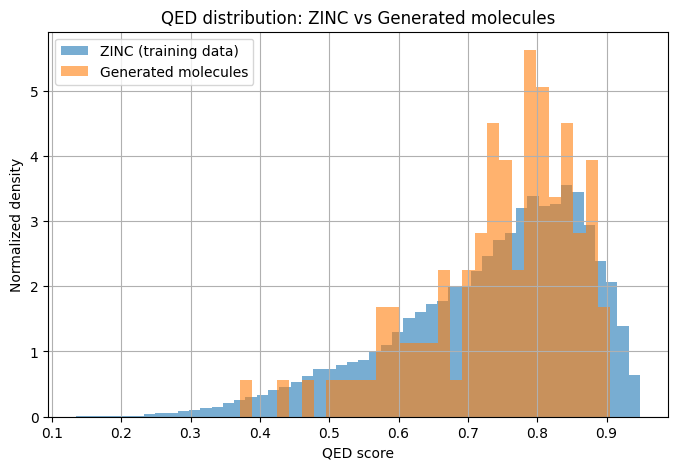

In [20]:
from rdkit.Chem import QED
import matplotlib.pyplot as plt

# ZINC ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò QED Ï†êÏàò Í≥ÑÏÇ∞
zinc_qeds = []
for smi in tqdm(df_zinc['smiles'], desc="ZINC QED Í≥ÑÏÇ∞ Ï§ë"):
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        try:
            qed_score = QED.qed(mol)
            zinc_qeds.append(qed_score)
        except:
            pass  # QED Í≥ÑÏÇ∞ Ï§ë Ïò§Î•òÍ∞Ä ÎÇ† Í≤ΩÏö∞ Î¨¥Ïãú

# ÏÉùÏÑ±Îêú Î∂ÑÏûêÎì§Ïùò QED Ï†êÏàò Í≥ÑÏÇ∞
generated_qeds = []
for mol in tqdm(generated_molecules, desc="ÏÉùÏÑ±Îêú Î∂ÑÏûêÏùò QED Í≥ÑÏÇ∞ Ï§ë"):
    try:
        qed_score = QED.qed(mol)
        generated_qeds.append(qed_score)
    except:
        pass

# QED Ï†êÏàò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî (Ï†ïÍ∑úÌôîÎêú ÌûàÏä§ÌÜ†Í∑∏Îû®)
plt.figure(figsize=(8, 5))
plt.hist(zinc_qeds, bins=50, alpha=0.6, label='ZINC (training data)', density=True)
plt.hist(generated_qeds, bins=30, alpha=0.6, label='Generated molecules', density=True)
plt.xlabel("QED score")
plt.ylabel("Normalized density")
plt.title("QED distribution: ZINC vs Generated molecules")
plt.legend()
plt.grid(True)
plt.show()


ÏÉùÏÑ±Îêú Î∂ÑÏûêÎì§Ïùò QED Î∂ÑÌè¨Îäî ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤πÏπ©ÎãàÎã§!  
(ÏßÄÍ∏à Ï†úÍ≥µÎêú ÏÇ¨Ï†Ñ ÌïôÏäµ Î™®Îç∏ÏùÄ **Ï∂©Î∂ÑÌûà ÌïôÏäµÎêú ÏµúÏ¢Ö Î™®Îç∏Ïù¥ ÏïÑÎãôÎãàÎã§**.  
Ï†úÎåÄÎ°ú ÌïôÏäµÎêú ÏÉùÏÑ± Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Îëê Î∂ÑÌè¨ Í∞ÑÏùò Í≤πÏπ®Ïù¥ **Ìõ®Ïî¨ Îçî Î™ÖÌôïÌïòÍ≤å ÎÇòÌÉÄÎÇ©ÎãàÎã§**)

Ïù¥Ïóê ÎåÄÌïú ÏûêÏÑ∏Ìïú ÏÇ¨Î°ÄÎäî Ïù¥ [ÎÖºÎ¨∏](https://www.nature.com/articles/s41467-022-30839-x)ÏùÑ Ï∞∏Í≥†ÌïòÏÑ∏Ïöî.
Ìï¥Îãπ ÎÖºÎ¨∏Ïùò Í∑∏Î¶ºÏóêÏÑú Îëê Î∂ÑÌè¨Ïùò Í≤πÏπ®Ïù¥ ÏñºÎßàÎÇò Ïûò ÎÇòÌÉÄÎÇòÎäîÏßÄ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§!

ÏßÄÍ∏à Ïó¨Îü¨Î∂ÑÏùÄ `Molecular Generative Models`Í∞Ä  
**ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê Ìè¨Ìï®Îêú Î∂ÑÏûêÏùò ÌäπÏÑ±ÏùÑ ÏñºÎßàÎÇò Ïûò Ïû¨ÌòÑÌïòÎäîÏßÄ** ÏßÅÏ†ë Í≤ÄÏ¶ùÌïú ÏÖàÏûÖÎãàÎã§ ü§©

---

Ïù¥Ï†ú Ïù¥ ÏÑπÏÖòÏùò ÌïµÏã¨ ÏßàÎ¨∏Ïóê ÎãµÌï† ÏãúÍ∞ÑÏûÖÎãàÎã§:  
**Ïù¥Í±¥ `Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏`ÏùºÍπåÏöî,    
ÏïÑÎãàÎ©¥ Ïã§Ï†úÎ°úÎäî ÏïÑÎ¨¥Í≤ÉÎèÑ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏßÄÎßå, Ïã§Ï†ú ÏûàÎäî Í≤ÉÏ≤òÎüº ÌùâÎÇ¥ÎÇ¥Îäî ÎßàÏûÑÏùºÍπåÏöî?**

Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨Ìï¥Î¥ÖÏãúÎã§:

1. Î™®Îç∏ÏùÄ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÎäî ÏÉàÎ°úÏö¥ `SMILES`Î•º ÏÉùÏÑ±Ìï† Ïàò ÏûàÏäµÎãàÎã§.  
2. ÏÉùÏÑ±Îêú `SMILES`Ïùò **Î∂ÑÏûêÏ†Å ÌäπÏÑ±**ÏùÄ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Ïú†ÏÇ¨Ìïú Î∂ÑÌè¨Î•º Îî∞Î¶ÖÎãàÎã§.

‚úÖ Í≤∞Î°†: `Molecular Generative Models`Îäî ÎßàÏπò **ÎßàÏûÑ**Í≥ºÎèÑ Í∞ôÏäµÎãàÎã§.  
ÏÉàÎ°úÏö¥ Î∂ÑÏûêÎ•º ÎßåÎì§Ïñ¥ÎÇ¥ÏßÄÎßå, Í∑∏ Î∂ÑÏûêÎì§ÏùÄ Ïó¨Ï†ÑÌûà ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ **Ïú†ÏÇ¨Ìïú ÌäπÏÑ± Î∂ÑÌè¨** ÏïàÏóê Ï°¥Ïû¨Ìï©ÎãàÎã§.

---

Ïù¥Í≤å Ïôú Ïú†Ïö©Ìï†ÍπåÏöî?

ÏòàÎ•º Îì§Ïñ¥, Ïó¨Îü¨Î∂ÑÏù¥ Í¥ÄÏã¨ ÏûàÎäî Î¨ºÏÑ± Î≤îÏúÑÎ•º Í∞ñÎäî Î∂ÑÏûêÎì§ÏùÑ Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÏûàÎã§Í≥† Ìï©ÏãúÎã§.  
Í∑∏Îü¥ Í≤ΩÏö∞, ÏÉùÏÑ± Î™®Îç∏ÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï¥ÎèÑ  
**Ìï¥Îãπ ÌäπÏÑ± Î≤îÏúÑ ÏïàÏóêÏÑú ÏÉàÎ°úÏö¥ Î∂ÑÏûêÎì§ÏùÑ Ìö®Ïú®Ï†ÅÏúºÎ°ú ÎßåÎì§Ïñ¥ÎÇº Ïàò ÏûàÏäµÎãàÎã§.**

Í∑∏Îü∞Îç∞ ÎßåÏïΩ,  
> üîç **ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î≤óÏñ¥ÎÇú ÏòÅÏó≠Ïùò Î¨ºÏÑ±ÏùÑ Í∞ÄÏßÄÎäî Î∂ÑÏûêÎ•º ÏÉùÏÑ±ÌïòÍ≥† Ïã∂Îã§Î©¥?**

Í∑∏ÎïåÎäî Ïù¥ ÏÉùÏÑ± Î™®Îç∏ ÏúÑÏóê **ÏµúÏ†ÅÌôî ÏïåÍ≥†Î¶¨Ï¶ò**ÏùÑ Í≤∞Ìï©Ìï¥  **Î™®Îç∏Ïù¥ ÏÉùÏÑ±ÌïòÎäî Î∂ÑÏûêÏùò ÌäπÏÑ± Î∂ÑÌè¨ ÏûêÏ≤¥Î•º "Ïù¥Îèô(shift)"**ÏãúÌÇ§Îäî Ï†ÑÎûµÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Ïù¥Î≤à ÌäúÌÜ†Î¶¨ÏñºÏùÄ Î∞îÎ°ú Í∑∏ Í∏∞Î∞òÏù¥ ÎêòÎäî Í∞úÎÖêÏùÑ Îã§Î£¨ Í≤ÉÏù¥Î©∞, Îã§Ïùå Ï£ºÏóêÎäî `REINVENT`Î•º Ïù¥Ïö©Ìïú Ïã§ÏäµÏùÑ ÌÜµÌï¥ Ïù¥ Í∞úÎÖêÏùÑ Ïã§Ï†úÎ°ú ÏßÅÏ†ë Ï≤¥ÌóòÌï¥Î≥¥Í≤å Îê©ÎãàÎã§.

---

Ïù¥Ï†ú ÎßàÏßÄÎßâÏúºÎ°ú, Ïö∞Î¶¨Í∞Ä ÏÉùÏÑ±Ìïú Î∂ÑÏûêÎì§Ïù¥ Ïñ¥Îñ§ Î™®ÏäµÏù∏ÏßÄ Ìïú Î≤à ÏÇ¥Ìé¥Î¥ÖÏãúÎã§! üëá


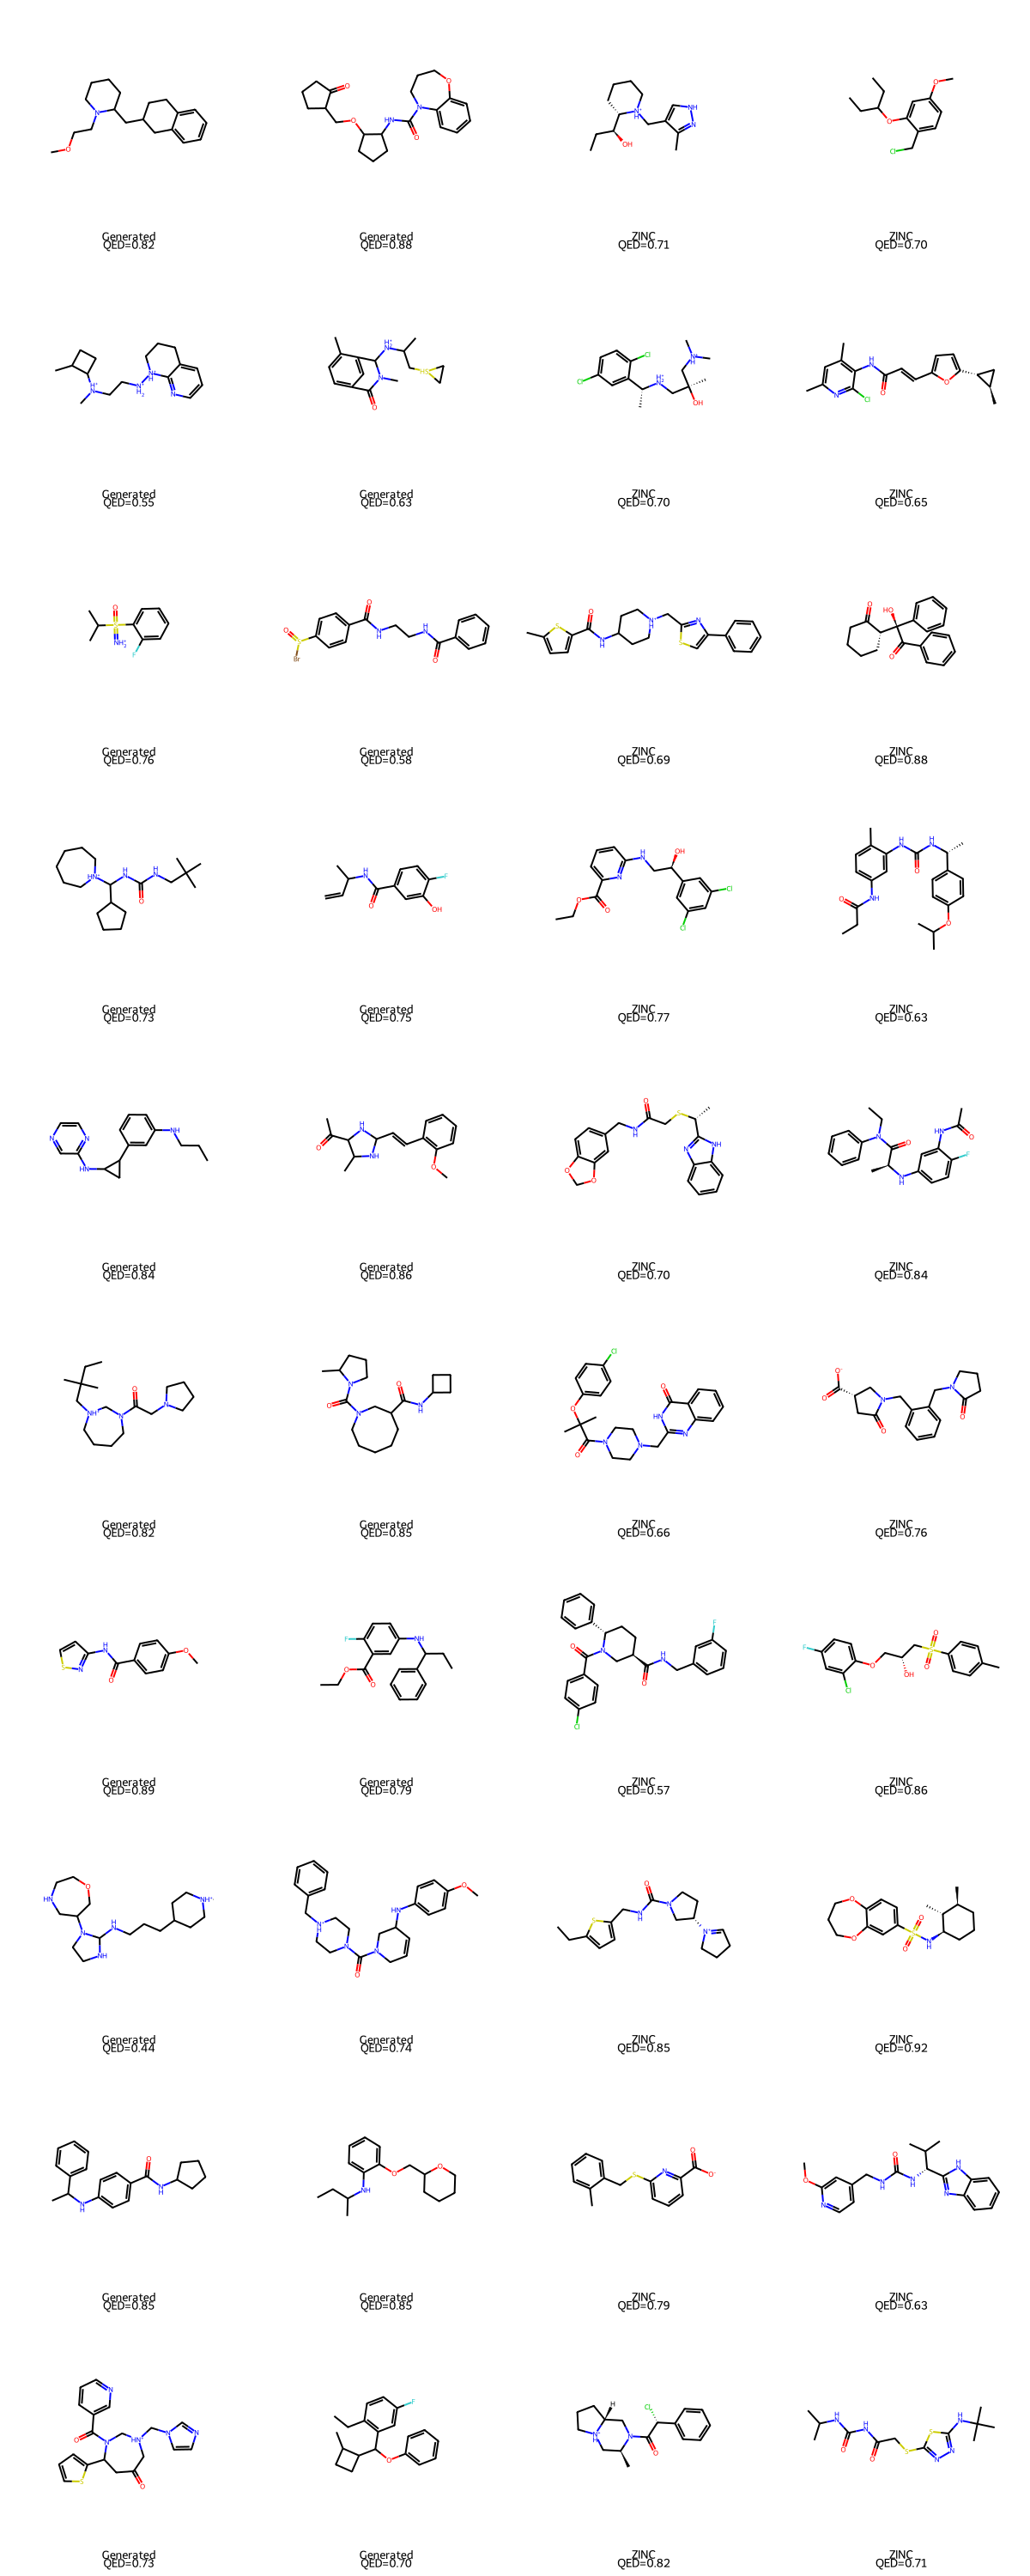

In [26]:
import random
from rdkit.Chem import Draw

# 1. Î¨¥ÏûëÏúÑ 20Í∞úÏî© Ï∂îÏ∂ú
sampled_gen_mols = random.sample(generated_molecules, 20)
zinc_mols = []
for smi in random.sample(list(zinc_smiles_set), 20):
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        zinc_mols.append(mol)

# 2. QED Ï†êÏàòÏôÄ Î†àÏ†ÑÎìú ÏÉùÏÑ±
def get_qed_legends(mols, label):
    legends = []
    for mol in mols:
        try:
            score = QED.qed(mol)
            legends.append(f"{label}\nQED={score:.2f}")
        except:
            legends.append(f"{label}\nQED=Err")
    return legends

gen_legends = get_qed_legends(sampled_gen_mols, "Generated")
zinc_legends = get_qed_legends(zinc_mols, "ZINC")

# 3. Îëê Í∞úÏî© Î¨∂Ïñ¥ÏÑú 4Í∞ú Îã®ÏúÑÎ°ú interleave
grouped_mols = []
grouped_legends = []

for i in range(0, 20, 2):
    grouped_mols.extend([
        sampled_gen_mols[i], sampled_gen_mols[i+1],
        zinc_mols[i], zinc_mols[i+1]
    ])
    grouped_legends.extend([
        gen_legends[i], gen_legends[i+1],
        zinc_legends[i], zinc_legends[i+1]
    ])

# 4. ÏãúÍ∞ÅÌôî (Ìïú Ï§ÑÏóê 4Í∞ú: G G | Z Z)
Draw.MolsToGridImage(
    grouped_mols,
    molsPerRow=4,
    subImgSize=(300, 300),
    legends=grouped_legends
)

# 2. Variational Autoencoder (VAE)

Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî `ChatGPT`Î•º ÏÇ¨Ïö©Ìï¥ ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§. ÏÇ¨Ïö©Ìïú ÌîÑÎ°¨ÌîÑÌä∏Îäî "a lego chef flattens a pancake"ÏûÖÎãàÎã§.

<div align="middle">
<img src="https://raw.githubusercontent.com/jfjoung/AI_For_Chemistry/main/img/pancake.png" width="400"/>
</div>


---

Ìå¨ÏºÄÏù¥ÌÅ¨Í∞Ä `VAE`ÏôÄ Î¨¥Ïä® Í¥ÄÎ†®Ïù¥ ÏûàÏùÑÍπåÏöî?  

Ïù¥Î≤à ÏÑπÏÖòÏóêÏÑúÎäî `VAE`Í∞Ä Î¨¥ÏóáÏùÑ ÌïòÎäîÏßÄÏóê ÎåÄÌïú **ÏßÅÍ¥ÄÏ†ÅÏù∏ Í∞úÏöî**Î•º ÏÜåÍ∞úÌï©ÎãàÎã§.

---

ÏÉÅÏÉÅÌï¥Î¥ÖÏãúÎã§. Ïó¨Îü¨Î∂Ñ ÏïûÏóê Ìå¨ÏºÄÏù¥ÌÅ¨Í∞Ä ÏåìÏó¨ ÏûàÏäµÎãàÎã§. Ïñ¥Îñ§ Ìå¨ÏºÄÏù¥ÌÅ¨Îäî Î∏îÎ£®Î≤†Î¶¨Í∞Ä ÏûàÍ≥†, Ïñ¥Îñ§ Í±¥ ÎùºÏ¶àÎ≤†Î¶¨Í∞Ä Ïò¨ÎùºÍ∞Ä ÏûàÏñ¥Ïöî.  
Ïù¥Ï†ú Ïó¨Îü¨Î∂ÑÏùÄ Í∞ÄÏû• ÌÅ∞ Ï£ºÍ±±ÏùÑ Îì§Ïñ¥ Ïù¥ Ìå¨ÏºÄÏù¥ÌÅ¨Îì§ÏùÑ **ÌïúÍ∫ºÎ≤àÏóê ÎÇ©ÏûëÌïòÍ≤å ÎàåÎü¨Î≤ÑÎ¶ΩÎãàÎã§** ‚Äî  
Í∑∏ Í≤∞Í≥ºÎäî ÏúÑ Ïù¥ÎØ∏ÏßÄÏ≤òÎüº, ÏõêÎûòÏùò Ìå¨ÏºÄÏù¥ÌÅ¨Í∞Ä Íµ¨Î∂ÑÎêòÏßÄ ÏïäÎäî **ÌïòÎÇòÏùò Í±∞ÎåÄÌïú ÎÇ©ÏûëÌïú Ìå¨ÏºÄÏù¥ÌÅ¨**ÏûÖÎãàÎã§.

Ïù¥Ï†ú Ïù¥ Í±∞ÎåÄÌïú Ìå¨ÏºÄÏù¥ÌÅ¨Ïùò ÌëúÎ©¥ÏùÑ ÏûêÏÑ∏Ìûà ÏÇ¥Ìé¥Î¥ÖÎãàÎã§.  
Ïñ¥ÎîòÍ∞ÄÏóê Î∏îÎ£®Î≤†Î¶¨Í∞Ä Î≥¥Ïù¥ÎÑ§Ïöî.  
Ïó¨Îü¨Î∂ÑÏùÄ "Ïù¥Í±¥ Î∂ÑÎ™Ö Î∏îÎ£®Î≤†Î¶¨ Ìå¨ÏºÄÏù¥ÌÅ¨ÏòÄÍ≤†ÏßÄ!"ÎùºÍ≥† Ï∂îÏ∏°Ìï©ÎãàÎã§.  
Ï°∞Í∏à Îçî ÎèåÏïÑÎã§ÎãàÎã§ Î≥¥Îãà, Î∏îÎ£®Î≤†Î¶¨ÎèÑ ÏûàÍ≥† ÎùºÏ¶àÎ≤†Î¶¨ÎèÑ ÏûàÎäî Î∂ÄÎ∂ÑÏù¥ ÏûàÏñ¥Ïöî.  
ÏõêÎûò Í∑∏Îü∞ Ìå¨ÏºÄÏù¥ÌÅ¨Îäî ÏóÜÏóàÎäîÎç∞Ïöî?  
Í∑∏ÎûòÏÑú Ïó¨Îü¨Î∂ÑÏùÄ Ïù¥ Ï°∞Í∞ÅÏùÄ **Î∏îÎ£®Î≤†Î¶¨ Ìå¨ÏºÄÏù¥ÌÅ¨ÏôÄ ÎùºÏ¶àÎ≤†Î¶¨ Ìå¨ÏºÄÏù¥ÌÅ¨Í∞Ä ÏÑûÏù∏ Î∂ÄÎ∂ÑÏùº Í≤É**Ïù¥ÎùºÍ≥† Ï∂îÎ°†Ìï©ÎãàÎã§.

---

Ïù¥Ï†ú Ïù¥ Ìå¨ÏºÄÏù¥ÌÅ¨ ÎπÑÏú†Î•º Í∏∞ÏñµÌïú Ï±Ñ, `VAE`Ïùò ÏûëÎèô Î∞©ÏãùÏùÑ ÎèÑÏãùÏ†ÅÏúºÎ°ú ÏÇ¥Ìé¥Î¥ÖÏãúÎã§.  
ÏïÑÎûò Ïù¥ÎØ∏ÏßÄÎäî [Saul Dobilas](https://towardsdatascience.com/vae-variational-autoencoders-how-to-employ-neural-networks-to-generate-new-images-bdeb216ed2c0)Ïùò ÏÑ§Î™ÖÏóêÏÑú Í∞ÄÏ†∏Ïò® Í≤ÉÏûÖÎãàÎã§:

<div align="middle">
<img src="https://raw.githubusercontent.com/jfjoung/AI_For_Chemistry/main/img/vae.png" width="900"/>
</div>


---

- `Encoder`: Î∂ÑÏûêÎ•º ÏûÖÎ†•Î∞õÏïÑ **Ï†ÄÏ∞®Ïõê Î≤°ÌÑ∞**Î°ú Î≥ÄÌôòÌïòÍ≥†, Ïù¥Î•º `Í∞ÄÏö∞ÏãúÏïà Î∂ÑÌè¨(Gaussian Distribution)`Î°ú Îß§ÌïëÌï©ÎãàÎã§.  
  Í∞ÄÏö∞ÏãúÏïà Î∂ÑÌè¨Îäî `ÌèâÍ∑†(mean)`Í≥º `Î∂ÑÏÇ∞(variance)`Îßå ÏïåÎ©¥ ÏôÑÏ†ÑÌûà Ï†ïÏùòÌï† Ïàò ÏûàÏäµÎãàÎã§.  
- `Latent Vector`: ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Í∏∞Î∞òÏúºÎ°ú, Ïó¨Í∏∞Ïóê **ÎÖ∏Ïù¥Ï¶à**Î•º Ï∂îÍ∞ÄÌïòÏó¨ ÏÉòÌîåÎßÅÎê©ÎãàÎã§.  
  ÏúÑ Í∑∏Î¶ºÏóêÏÑúÎäî Ïù¥ ÎÖ∏Ïù¥Ï¶àÎèÑ Í∞ÄÏö∞ÏãúÏïàÏóêÏÑú ÎΩëÏäµÎãàÎã§.
- `Decoder`: Ïù¥ `Latent Vector`Î•º Î∞õÏïÑ ÏõêÎûò ÏûÖÎ†•ÏùÑ **Ïû¨Íµ¨ÏÑ±(reconstruct)**ÌïòÎäî Ïó≠Ìï†ÏùÑ Ìï©ÎãàÎã§.

---

Ïù¥Ï†ú Îã§Ïãú Ìå¨ÏºÄÏù¥ÌÅ¨Î°ú ÎèåÏïÑÍ∞Ä Î¥ÖÏãúÎã§ üçΩÔ∏è

Î™®Îì† Î∂ÑÏûêÎ•º `Encoder`Î°ú ÌÜµÍ≥ºÏãúÏºú **Ï†ÄÏ∞®Ïõê Ïó∞ÏÜç Í≥µÍ∞Ñ(Latent Space)** Ïóê ÏúÑÏπòÏãúÌÇ§Îäî Í≤ÉÏùÄ  
Î∏îÎ£®Î≤†Î¶¨ÏôÄ ÎùºÏ¶àÎ≤†Î¶¨ Ìå¨ÏºÄÏù¥ÌÅ¨Î•º **ÌïòÎÇòÏùò ÎÇ©ÏûëÌïú Ìå¨ÏºÄÏù¥ÌÅ¨Î°ú ÏïïÏ∂ï**ÌïòÎäî Í≤ÉÍ≥º Í∞ôÏäµÎãàÎã§.  

Í∑∏ ÌõÑ `Decoder`Îäî Ïù¥ ÎÇ©ÏûëÌïú Ìå¨ÏºÄÏù¥ÌÅ¨Ïùò Ìïú ÏßÄÏ†êÏùÑ Î≥¥Í≥†  
"Ïù¥Í±¥ Î∏îÎ£®Î≤†Î¶¨ Ìå¨ÏºÄÏù¥ÌÅ¨ÏòÄÍ≤†ÏßÄ!" ÌïòÎ©∞ ÏõêÎûò Î∂ÑÏûêÎ•º **Ïû¨Íµ¨ÏÑ±**ÌïòÎäî Í±∞Ï£†.  
Î∏îÎ£®Î≤†Î¶¨ÏôÄ ÎùºÏ¶àÎ≤†Î¶¨Í∞Ä ÏÑûÏù∏ Î∂ÄÎ∂ÑÏù¥ÎùºÎ©¥?  
Í∑∏ÎïåÎäî Î∏îÎ£®Î≤†Î¶¨ÏôÄ ÎùºÏ¶àÎ≤†Î¶¨Í∞Ä **ÏÑûÏù∏ ÏÉàÎ°úÏö¥ Î∂ÑÏûê**Î•º ÏÉùÏÑ±ÌïòÍ≤å Îê©ÎãàÎã§.

Î∞îÎ°ú Ïù¥ Î∂ÄÎ∂ÑÏù¥ **Î∂ÑÏûê ÏÉùÏÑ± Î™®Îç∏(Molecular Generative Model)**Ïùò ÌïµÏã¨ÏûÖÎãàÎã§ ‚Äî  
`Latent Space`ÏóêÏÑú Îã§ÏñëÌïú ÏúÑÏπòÎ•º ÏÉòÌîåÎßÅÌï®ÏúºÎ°úÏç®  
`Decoder`Îäî **ÏÉàÎ°úÏö¥ Î∂ÑÏûêÎì§ÏùÑ ÏÉùÏÑ±**Ìï† Ïàò ÏûàÏäµÎãàÎã§!

---

[`VAE` Ïõê ÎÖºÎ¨∏](https://pubs.acs.org/doi/10.1021/acscentsci.7b00572)ÏóêÏÑúÎäî  
Latent Space ÏÉÅÏóêÏÑú Î∂ÑÏûêÏùò Î¨ºÏÑ±ÏùÑ ÏòàÏ∏°ÌïòÎäî Ïã†Í≤ΩÎßùÏùÑ ÌïôÏäµÏãúÌÇ§Í∏∞ÎèÑ ÌïòÍ≥†,  
Latent Space ÏïàÏóêÏÑú Ïñ¥Îñ§ ÏãúÏûë Î∂ÑÏûêÏóêÏÑú Ï∂úÎ∞úÌï¥ **ÏõêÌïòÎäî Î¨ºÏÑ±Ïùò Î∂ÑÏûêÎ°ú Ïù¥ÎèôÌïòÎäî Î∞©Î≤ï**ÎèÑ Î≥¥Ïó¨Ï§çÎãàÎã§.

Ïù¥Î≤à ÌäúÌÜ†Î¶¨ÏñºÏóêÏÑúÎäî ÏÑ∏Î∂ÄÏ†ÅÏù∏ ÏàòÏãùÏùÄ ÏÉùÎûµÌïòÍ≥†,  
`Latent Space`Í∞Ä Ïñ¥Îñ§ Í≤ÉÏù∏ÏßÄ **ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Ïù¥Ìï¥**ÌïòÎäî Îç∞ ÏßëÏ§ëÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.
